In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
from src.cleaner import *
pd.options.mode.chained_assignment = None

In [2]:
df=pd.read_csv('data/first_mens_scrape6010.csv')

In [3]:
df=cleaner(df)

In [4]:
item_item=df[['frag rating','main accords','top notes','top notes id','mid notes','mid notes id','base notes','base notes id','user voted notes','close to skin','radiates about arm length','radiates 6ft','fills room','30min to 1hr','1hr to 2hr','3hr to 6hr','7hr to 12hr','greater than 12hr','similiar fragrences by user vote']]

In [5]:
item_item.drop(304,inplace=True)

In [113]:
item_item.describe()

,close to skin,radiates about arm length,radiates 6ft,fills room,30min to 1hr,1hr to 2hr,3hr to 6hr,7hr to 12hr,greater than 12hr,marine,vinyl,woody,nutty,tonka (coumarin),savory,salty,lactonic,metallic,beeswax,cannabis,aldehydic,soft spicy,caramel,oud,chocolate,alcohol,vanilla,fruity,aromatic,fresh spicy,tobacco,coconut,mineral,spice,honey,tuberose,aquatic,whiskey,herbal,almond,camphor,floral,leather,rum,cinnamon,balsamic,gourmand,wine,earthy,smoky,sour,conifer,sweet,amber,vodka,tropical,green,yellow floral,coca-cola,patchouli,bitter,mossy,animalic,powdery,musky,soapy,ozonic,coffee,rose,cacao,sand,terpenic,citrus,watery,asphault,white floral,warm spicy,fresh,Sea water,Beech,Italian Mandarin,Egyptian balsam,Immortelle,Sicilian Bergamot,Lemon Blossom,Black Violet,Litchi,iris,watercress,Cassis,Sequoia,Nutmeg,Lily,Orchid,Carrot,Vermouth,Italian Melon,Metallic notes,Rum,White Amber,Chinese Cinnamon Wood,Lime,Coca,White Suede,Bitter Orange,Rhubarb,Sour Cherry,French labdanum,Green Pepper,Oriental Woodsy notes,Rhubarb Leaf,Hawaiian Fruits,Civetta,Balsam Fir,Oriental notes,Water Mint,Agave,Hyacinth,Violet,Mai Tai Cocktail,Kyara Incense (olibanum),Pomelo,Solar notes,Freesia,Chocolate,Vodka,Soil tincture,Bourbon Pepper,Calabrian Mandarin,Plum,Banana Leaf,Italian Orange,Sichuan Pepper,Myrtle,plum,Hoary Stock,Papaya,Peppertree,Bergamot,Amalfi Lemon,Red Pepper,Lemon Zest,Siam Benzoin,Galbanum,Spices,Red Currant,Nutmeg Flower,Saffron,Olive Blossom,Rock rose,Bergamot Leaf,Thyme,Juniper Berries,Citrus Leaves,Oak Tree,Holly,Bay Leaf,Ylang-Ylang,Palisander Rosewood,white honey,Buchu or Agathosma,Sicilian citrus,Reseda,Ambergris,Celery,Cinnamon,Apple,Chrysanthemum,Virginian Cedar,Cardamom,Bitter Orange Blossom,Tequila,Flowers,Camelia,Water Notes,Lemon Peel,Pepper,Magnolia,Santolina,May Rose,Carambola (Star Fruit),Tunisian Orange Blossom,Cardamon,Canadian Pine,Lemongrass,Pomegranate,Ivy,Bamboo,Parsley,Allspice,Black Orchid,Chinese Orange,Orris Root,Pineapple Leaf,Pink Nerium Oleander,Wild Lavender,Aquozone,Wood resin,Hay,Big Strawberry,St. John's Wort,Poppy,Tiare Flower,Rose Oil,Bulgarian Rose,Fern,Costus,Artemisia,Marigold,Privet,Hinoki Wood,Pine needles,Currant buds,Caviar,White Ginger Lily,Tomato Leaf,Pear Leaf,Tropical fruit,Coriander,Peach,Incense,Castoreum,Amberwood,Cucumber,Musk,Tobacco blossom,Boletus edulis,Blackcurrant Syrup,Styrax,Hiacynth,Fig,mulberry,Anise,Star Anise,Citrus and Floral Notes,Cade oil,Blue Poppy,Pink Grapefruit,Lotus Leaf,Angelica,Grapes,Palm Leaf,Tarragon,Chamomile,Pineapple,Cumin,vetyver,Pine,Juniper,Basil,Clover,White tobacco,elemi,Mexican chocolate,Argentinian Lemon,violet leaves,Persimmon,Apricot,Lime (Linden) Blossom,Pelargonium,Bourbon Geranium,Maple,Jasmine,Wild berries,Finger Lime,Exotic Spices,Ambrarome,Tobacco Leaf,Basil Leaf,Brazilian Redwood,black fig,Granny Smith apple,Ginger,Salt,Whipped cream,Cranberry,Coconut Nectar,Moss,Fruits,Rose de Mai,dark woodsy notes,Wormwood,Acai berry,Aloe Vera,Berry Fruits,Black Cardamom,Carnation,Rhuburb,Night Blooming Jasmine,Blackwood,Brandy,Starfish,Heliotrope,Laurels,Pistachio,Lichen,Red wine,Coca-Cola,Fig Leaf,Flax,Pear,Leatherwood,Ebony Wood,Bellflower,Animal notes,Blue Lavender,Copahu Balm,Coconut Milk,Resin,Guatemalan Cardamom,Rosebay Willowherb,Tangerine,Cacao,Iced Tea,Roasted Coffee Beans,White Cedar Extract,Hortensia,Orange Blossom,Madagascar Pepper,Ice,tincture of rose,Citruses,Yellow Mandarin,Passion Flower,Amaretto,Camphor,Cognac,Petitgrain,Driftwood,Dates,Red Cedar,Walnut,Oak,Calone,Banana,Sweet Orange,Green Accord,Hazelnut,White Peach,Calabrian bergamot,Cabreuva,Mint,Taif Rose,Sandalwood,Tomato,Dried Plum,Orange Leaf,Egyptian Jasmine,White Currant,Calamus,White Pear,Madagascar Ylang-Ylang,Italian Tangerine,Mate,Mandarin Blossom,Benzoin,Cacao Pod,Massoia,Palm Tree,Tea Leaf,Cactus,Osmanthus,Lilac,Myrrh,Tropical Fruits,gunpowder,Fruity Notes,Wildflowers,Birch Leaf,Madagascar Cloves,Guava,White Flowers,Hyssop,Asafoetida,Cyclamen,Sicilian Lemon,Orange Peel,Marmal

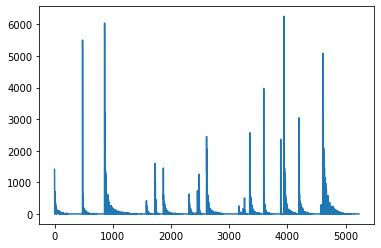

In [7]:
plt.plot(df['have it']);

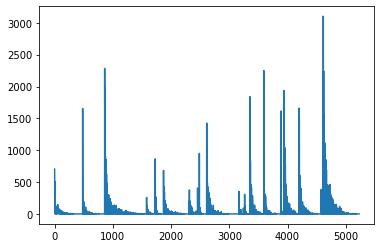

In [8]:
plt.plot(df['want it']);

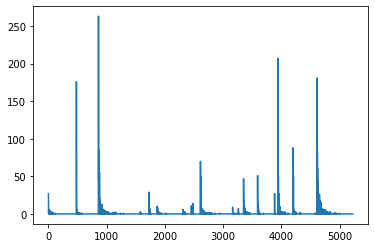

In [9]:
plt.plot(df['signature']);

In [11]:
accords=[]
for i in item_item['main accords']:
    for key in i.keys():
        accords.append(key)

for idx,acc in enumerate(accords):
    if acc == 'Pictures':
        accords.pop(idx)
    if acc == 'Videos':
        accords.pop(idx)

x=set(accords)
accords=list(x)

for accord in accords:
        item_item[accord]=0

In [12]:
for idx,i in enumerate(item_item['main accords']):
     for key,value in i.items():
            if key == 'Pictures':
                continue
            elif key == 'Videos':
                continue
            else:
                item_item[key][idx]=value

In [20]:
item_item.drop(columns='main accords',inplace=True)

In [69]:
all_notes=[]
for notes in item_item['top notes']:
    for note in notes:
        all_notes.append(note)
for notes in item_item['mid notes']:
    for note in notes:
        all_notes.append(note)
for notes in item_item['base notes']:
    for note in notes:
        all_notes.append(note)

In [70]:
an=set(all_notes)
all_notes=list(an)

In [73]:
for note in all_notes:
    item_item[note]=0

In [75]:
top_notes = item_item['top notes']
mid_notes=item_item['mid notes']
base_notes=item_item['base notes']

for idx,notes in enumerate(top_notes):
    for note in notes:
        item_item[note][idx]=1
for idx,notes in enumerate(mid_notes):
    for note in notes:
        item_item[note][idx]=1
for idx,notes in enumerate(base_notes):
    for note in notes:
        item_item[note][idx]=1

In [78]:
item_item.drop(columns=['top notes','mid notes','base notes'], inplace=True)

In [85]:
item_item['winter']=0
item_item['spring']=0
item_item['summer']=0
item_item['autumn']=0
item_item['day']=0
item_item['night']=0
item_item['avg rating']=0
item_item['female love u25']=0
item_item['female love o25']=0
item_item['male love u25']=0
item_item['male love o25']=0
item_item['female like u25']=0
item_item['female like o25']=0
item_item['male like u25']=0
item_item['male like o25']=0
item_item['female dislike u25']=0
item_item['female dislike o25']=0
item_item['male dislike u25']=0
item_item['male dislike o25']=0

for idx,frag in enumerate(item_item['frag rating']):
    for k,v in sorted(frag.items()):
        if k=='clswinter':
            item_item['winter'][idx]= v
        if k=='clsspring':
            item_item['spring'][idx]= v
        if k=='clssummer':
            item_item['summer'][idx]= v
        if k=='clsautumn':
            item_item['autumn'][idx]= v
        if k=='clsday':
            item_item['day'][idx]= v
        if k=='clsnight':
            item_item['night'][idx]= v
        if k=='clslove_female25under':
            item_item['female love u25'][idx]= v
        if k=='clslove_male25under':
            item_item['male love u25'][idx]= v
        if k=='clslove_female25older':
            item_item['female love o25'][idx]= v
        if k=='clslove_male25older':
            item_item['male love o25'][idx]= v
        if k=='clslike_female25under':
            item_item['female like u25'][idx]= v
        if k=='clslike_male25under':
            item_item['male like u25'][idx]= v
        if k=='clslike_female25older':
            item_item['female like o25'][idx]= v
        if k=='clslike_male25older':
            item_item['male like o25'][idx]= v
        if k=='clsdislike_female25under':
            item_item['female dislike u25'][idx]= v
        if k=='clsdislike_male25under':
            item_item['male dislike u25'][idx]= v
        if k=='clsdislike_female25older':
            item_item['female dislike o25'][idx]= v
        if k=='clsdislike_male25older':
            item_item['male dislike o25'][idx]= v
        if k=='average_rating':
            item_item['avg rating'].iloc[idx]=float(v)

In [107]:
item_item.drop(columns='frag rating',inplace=True)

In [98]:
# item_item['avg rating']=0
# for idx,frag in enumerate(item_item['frag rating']):
#     for k,v in sorted(frag.items()):
#         if k=='average_rating':
#             item_item['avg rating'].iloc[idx]=float(v)

In [109]:
item_item=item_item.drop(columns=['top notes id','mid notes id','base notes id','user voted notes'])

In [110]:
item_item

,close to skin,radiates about arm length,radiates 6ft,fills room,30min to 1hr,1hr to 2hr,3hr to 6hr,7hr to 12hr,greater than 12hr,similiar fragrences by user vote,marine,vinyl,woody,nutty,tonka (coumarin),savory,salty,lactonic,metallic,beeswax,cannabis,aldehydic,soft spicy,caramel,oud,chocolate,alcohol,vanilla,fruity,aromatic,fresh spicy,tobacco,coconut,mineral,spice,honey,tuberose,aquatic,whiskey,herbal,almond,camphor,floral,leather,rum,cinnamon,balsamic,gourmand,wine,earthy,smoky,sour,conifer,sweet,amber,vodka,tropical,green,yellow floral,coca-cola,patchouli,bitter,mossy,animalic,powdery,musky,soapy,ozonic,coffee,rose,cacao,sand,terpenic,citrus,watery,asphault,white floral,warm spicy,fresh,Sea water,Beech,Italian Mandarin,Egyptian balsam,Immortelle,Sicilian Bergamot,Lemon Blossom,Black Violet,Litchi,iris,watercress,Cassis,Sequoia,Nutmeg,Lily,Orchid,Carrot,Vermouth,Italian Melon,Metallic notes,Rum,White Amber,Chinese Cinnamon Wood,Lime,Coca,White Suede,Bitter Orange,Rhubarb,Sour Cherry,French labdanum,Green Pepper,Oriental Woodsy notes,Rhubarb Leaf,Hawaiian Fruits,Civetta,Balsam Fir,Oriental notes,Water Mint,Agave,Hyacinth,Violet,Mai Tai Cocktail,Kyara Incense (olibanum),Pomelo,Solar notes,Freesia,Chocolate,Vodka,Soil tincture,Bourbon Pepper,Calabrian Mandarin,Plum,Banana Leaf,Italian Orange,Sichuan Pepper,Myrtle,plum,Hoary Stock,Papaya,Peppertree,Bergamot,Amalfi Lemon,Red Pepper,Lemon Zest,Siam Benzoin,Galbanum,Spices,Red Currant,Nutmeg Flower,Saffron,Olive Blossom,Rock rose,Bergamot Leaf,Thyme,Juniper Berries,Citrus Leaves,Oak Tree,Holly,Bay Leaf,Ylang-Ylang,Palisander Rosewood,white honey,Buchu or Agathosma,Sicilian citrus,Reseda,Ambergris,Celery,Cinnamon,Apple,Chrysanthemum,Virginian Cedar,Cardamom,Bitter Orange Blossom,Tequila,Flowers,Camelia,Water Notes,Lemon Peel,Pepper,Magnolia,Santolina,May Rose,Carambola (Star Fruit),Tunisian Orange Blossom,Cardamon,Canadian Pine,Lemongrass,Pomegranate,Ivy,Bamboo,Parsley,Allspice,Black Orchid,Chinese Orange,Orris Root,Pineapple Leaf,Pink Nerium Oleander,Wild Lavender,Aquozone,Wood resin,Hay,Big Strawberry,St. John's Wort,Poppy,Tiare Flower,Rose Oil,Bulgarian Rose,Fern,Costus,Artemisia,Marigold,Privet,Hinoki Wood,Pine needles,Currant buds,Caviar,White Ginger Lily,Tomato Leaf,Pear Leaf,Tropical fruit,Coriander,Peach,Incense,Castoreum,Amberwood,Cucumber,Musk,Tobacco blossom,Boletus edulis,Blackcurrant Syrup,Styrax,Hiacynth,Fig,mulberry,Anise,Star Anise,Citrus and Floral Notes,Cade oil,Blue Poppy,Pink Grapefruit,Lotus Leaf,Angelica,Grapes,Palm Leaf,Tarragon,Chamomile,Pineapple,Cumin,vetyver,Pine,Juniper,Basil,Clover,White tobacco,elemi,Mexican chocolate,Argentinian Lemon,violet leaves,Persimmon,Apricot,Lime (Linden) Blossom,Pelargonium,Bourbon Geranium,Maple,Jasmine,Wild berries,Finger Lime,Exotic Spices,Ambrarome,Tobacco Leaf,Basil Leaf,Brazilian Redwood,black fig,Granny Smith apple,Ginger,Salt,Whipped cream,Cranberry,Coconut Nectar,Moss,Fruits,Rose de Mai,dark woodsy notes,Wormwood,Acai berry,Aloe Vera,Berry Fruits,Black Cardamom,Carnation,Rhuburb,Night Blooming Jasmine,Blackwood,Brandy,Starfish,Heliotrope,Laurels,Pistachio,Lichen,Red wine,Coca-Cola,Fig Leaf,Flax,Pear,Leatherwood,Ebony Wood,Bellflower,Animal notes,Blue Lavender,Copahu Balm,Coconut Milk,Resin,Guatemalan Cardamom,Rosebay Willowherb,Tangerine,Cacao,Iced Tea,Roasted Coffee Beans,White Cedar Extract,Hortensia,Orange Blossom,Madagascar Pepper,Ice,tincture of rose,Citruses,Yellow Mandarin,Passion Flower,Amaretto,Camphor,Cognac,Petitgrain,Driftwood,Dates,Red Cedar,Walnut,Oak,Calone,Banana,Sweet Orange,Green Accord,Hazelnut,White Peach,Calabrian bergamot,Cabreuva,Mint,Taif Rose,Sandalwood,Tomato,Dried Plum,Orange Leaf,Egyptian Jasmine,White Currant,Calamus,White Pear,Madagascar Ylang-Ylang,Italian Tangerine,Mate,Mandarin Blossom,Benzoin,Cacao Pod,Massoia,Palm Tree,Tea Leaf,Cactus,Osmanthus,Lilac,Myrrh,Tropical Fruits,gunpowder,Fruity Notes,Wildflowers,Birch Leaf,Madagascar Cloves,Guava,White Flowers,Hyssop,Asafoetida,Cyclamen,

In [ ]:
#normalize data? turn to 1 and 0?
#fill avg for 0 values in avg rating
#what to do with negative meaning feature when normalizing
#duplicate columns?

In [134]:
((44*5)+(100*4)+(27*1))/170

3.8058823529411763

In [120]:
for i in df['user reviews']

dict_keys(['kirrineyears', 'Registeralloveragain', 'Littlevic', 'Luna_J', 'adiscourseinfragrance', 'Fjb2210', 'FatLipWill', 'Krisena', 'M-as-Marin', 'Naughtius Maximus', 'OldFragMan', 'marcel2782', 'Tomasr', 'Adair', 'brokesta911', 'yafresh', 'Le Chypriote', 'Don Joe', 'FragChronic', 'joseph matthias young', 'fragrantica_fan', 'Sea2Summit', '6opar', 'radi85', 'Taghi', 'lukemosse', 'Anywhereyouare', 'Pempipot', 'deb martinez', 'DCE', 'Alex Fragrantomaniac', 'Lomasfuerte', 'sitingqueen', 'sellersburg', '12345', 'Thomaso7', 'MarkMac', 'ericrico', 'miayman', 'Harbinger', 'zhiang0113', 'jæ', 'ILikePeeps', 'brianfamous88', 'ad_scott', 'Shugenja', 'wisconsinboy', 'SteveWRX', 'lsivokhina', 'AaronStar', 'PimlicoNose', 'Acent', 'steppx', 'Poupchette', 'Cortina1981', 'GustaveTheNose', 'DrNDJas', 'gannon13', 'LucasGoose', 'rschmidt65', 'missm2u', 'Chacmool', 'likesgoodscents', 'Judespeak', 'elGonzo', 'jayjay88', 'Inguz', 'Le Knows', 'BoxOfRain23', 'RJ Watson', 'gedlive', 'PianoDan', 'afterdark', '

In [122]:
df['user reviews'][0]

{'kirrineyears': "A simple and lovely classic. I don't wear many masculines, but this is very classy and easy to enjoy. An initial blast of sweet lavender quickly gives way to a vanilla musk dry down - just as the notes list suggests. A clean scent that suits a post day-time shower and reminds of fresh white bath towels and cool spring/summer breeze from surrounding lavender fields in the French countryside. I think guys of 30+ can wear this well. May 24 2020",
 'Registeralloveragain': 'I’ve got a vintage bottle and a current, the current is actually better. It is a very simple scent though, surprisingly the Sport version is actually way more complex and better. The sport version has a natural ambergris note which is awesome. It isn’t any kind of ambrox or any of those, it definitely is like a small amount of natural ambergris. My reference for ambergris is baikal Gris from areej le dore May 14 2020',
 'Littlevic': 'Love this!  Been looking for a realistic lavender perfume for years, t

In [ ]:
#how to test for item-item recommenders if there is no ratings?
#can i recreate user ratings given the demographic data of love/like/dislike?